In [1]:
#importing libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Importing classes for Feature Engineering and Random Forest classifcation
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [3]:
#Reading Train data
dataset = pd.read_csv('../../Large_data/Hackerearth_pets//train.csv')

In [4]:
dataset.head()

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category
0,ANSL_69903,2016-07-10 00:00:00,2016-09-21 16:25:00,2.0,Brown Tabby,0.80,7.78,13,9,0.0,1
1,ANSL_66892,2013-11-21 00:00:00,2018-12-27 17:47:00,1.0,White,0.72,14.19,13,9,0.0,2
2,ANSL_69750,2014-09-28 00:00:00,2016-10-19 08:24:00,NaN,Brown,0.15,40.90,15,4,2.0,4
3,ANSL_71623,2016-12-31 00:00:00,2019-01-25 18:30:00,1.0,White,0.62,17.82,0,1,0.0,2
4,ANSL_57969,2017-09-28 00:00:00,2017-11-19 09:38:00,2.0,Black,0.50,11.06,18,4,0.0,1


In [5]:
#Seperating target and dependent variabel
Y = dataset[['breed_category','pet_category']]
X = dataset.drop(labels=['pet_id','issue_date','listing_date','breed_category','pet_category'], axis = 1)

In [36]:
#Spliting the data set into train and validation set
X_train, X_test, Y_train, Y_test =  train_test_split(X, Y, test_size=0.3, random_state=0)

In [7]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(18834, 6)
(13183, 6)
(5651, 6)
(13183, 2)
(5651, 2)


In [8]:
X_train.head()

,condition,color_type,length(m),height(cm),X1,X2
15156,2.0,Orange Tabby,0.87,27.85,13,9
10048,1.0,Blue,0.07,5.34,0,1
15750,0.0,Brown,0.75,35.05,13,9
5988,0.0,Black,0.63,25.49,0,1
20,1.0,Brown Tabby,0.66,36.01,0,1


In [9]:
X_train.isnull().mean()

condition     0.077676
color_type    0.000000
length(m)     0.000000
height(cm)    0.000000
X1            0.000000
X2            0.000000
dtype: float64

In [10]:
X_test.isnull().mean()

condition     0.080163
color_type    0.000000
length(m)     0.000000
height(cm)    0.000000
X1            0.000000
X2            0.000000
dtype: float64

In [11]:
X_train.condition.unique()

array([ 2.,  1.,  0., nan])

In [12]:
X_test.condition.unique()

array([ 1.,  0.,  2., nan])

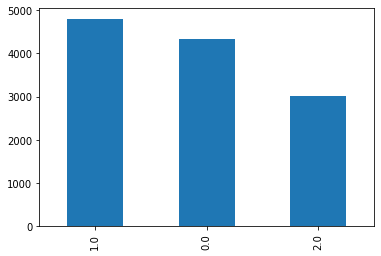

In [13]:
X_train['condition'].value_counts().sort_values(ascending=False).plot.bar()

In [14]:
X_train['condition'].mode()

0    1.0
dtype: float64

Replaceing NULL with Missing

In [37]:
X_train['condition'].fillna('3', inplace=True)

/home/vicky/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


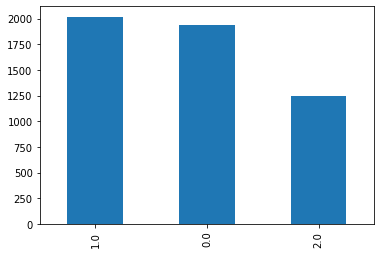

In [38]:
X_test['condition'].value_counts().sort_values(ascending=False).plot.bar()

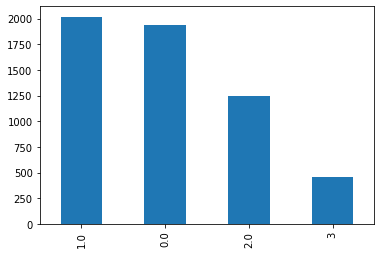

In [39]:
X_test['condition'].fillna('3', inplace=True)
X_test['condition'].value_counts().sort_values(ascending=False).plot.bar()

In [18]:
print(X_train.shape)
print(X_test.shape)

(13183, 6)
(5651, 6)


Now encoding the data

In [19]:
X_train.columns

Index(['condition', 'color_type', 'length(m)', 'height(cm)', 'X1', 'X2'], dtype='object')

In [20]:
X_train.color_type.unique()

array(['Orange Tabby', 'Blue', 'Brown', 'Black', 'Brown Tabby', 'Torbie',
       'Tricolor', 'Tan', 'Calico', 'Gray Tabby', 'Chocolate', 'White',
       'Red', 'Cream Tabby', 'Gray', 'Blue Tabby', 'Lynx Point',
       'Black Tabby', 'Brown Merle', 'Calico Point', 'Fawn', 'Cream',
       'Sable', 'Brown Brindle', 'Seal Point', 'Buff', 'Yellow', 'Tortie',
       'Black Brindle', 'Silver', 'Flame Point', 'Blue Merle',
       'Blue Tiger', 'Lilac Point', 'Blue Tick', 'Orange', 'Tortie Point',
       'Gold', 'Chocolate Point', 'Liver', 'Red Tick', 'Brown Tiger',
       'Silver Tabby', 'Black Smoke', 'Apricot', 'Liver Tick',
       'Blue Cream', 'Blue Point', 'Pink', 'Agouti', 'Yellow Brindle',
       'Blue Smoke', 'Red Merle', 'Green', 'Silver Lynx Point',
       'Black Tiger'], dtype=object)

In [40]:
#reduce color category
def reduce_cat(data):
    Split_data = []
    for row in data:
        if len(row)>1:
            Split_data.append(row.split(' ')[0])
        else:
            Split_data.append(row)
    return Split_data

In [41]:
X_train["scolor"] = reduce_cat(X_train["color_type"])
X_test["scolor"] = reduce_cat(X_test["color_type"]) 

/home/vicky/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/vicky/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [42]:
X_train = X_train.drop(["color_type"], axis=1)
X_test = X_test.drop(["color_type"], axis=1)

In [43]:
X_train.head()

,condition,length(m),height(cm),X1,X2,scolor
15156,2,0.87,27.85,13,9,Orange
10048,1,0.07,5.34,0,1,Blue
15750,0,0.75,35.05,13,9,Brown
5988,0,0.63,25.49,0,1,Black
20,1,0.66,36.01,0,1,Brown


In [44]:
tmp1  = pd.get_dummies(X_train["scolor"])
tmp2  = pd.get_dummies(X_test["scolor"])

In [45]:
X_train = X_train.drop(["scolor"], axis=1)
X_test = X_test.drop(["scolor"], axis=1)

In [46]:
X_train = pd.concat([X_train,tmp1],axis=1)

In [47]:
 X_train.columns

Index(['condition', 'length(m)', 'height(cm)', 'X1', 'X2', 'Agouti', 'Apricot',
       'Black', 'Blue', 'Brown', 'Buff', 'Calico', 'Chocolate', 'Cream',
       'Fawn', 'Flame', 'Gold', 'Gray', 'Green', 'Lilac', 'Liver', 'Lynx',
       'Orange', 'Pink', 'Red', 'Sable', 'Seal', 'Silver', 'Tan', 'Torbie',
       'Tortie', 'Tricolor', 'White', 'Yellow'],
      dtype='object')

In [48]:
X_train.head()

,condition,length(m),height(cm),X1,X2,Agouti,Apricot,Black,Blue,Brown,...,Red,Sable,Seal,Silver,Tan,Torbie,Tortie,Tricolor,White,Yellow
15156,2,0.87,27.85,13,9,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10048,1,0.07,5.34,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
15750,0,0.75,35.05,13,9,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5988,0,0.63,25.49,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
20,1,0.66,36.01,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [49]:
X_test = pd.concat([X_test,tmp2],axis=1)

In [50]:
X_train.isnull().mean()

condition     0.0
length(m)     0.0
height(cm)    0.0
X1            0.0
X2            0.0
Agouti        0.0
Apricot       0.0
Black         0.0
Blue          0.0
Brown         0.0
Buff          0.0
Calico        0.0
Chocolate     0.0
Cream         0.0
Fawn          0.0
Flame         0.0
Gold          0.0
Gray          0.0
Green         0.0
Lilac         0.0
Liver         0.0
Lynx          0.0
Orange        0.0
Pink          0.0
Red           0.0
Sable         0.0
Seal          0.0
Silver        0.0
Tan           0.0
Torbie        0.0
Tortie        0.0
Tricolor      0.0
White         0.0
Yellow        0.0
dtype: float64

In [71]:
#Creating random forest object
classifier = RandomForestClassifier(n_estimators=30, criterion='entropy', random_state=0)

In [72]:
classifier.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [73]:
#Predicting the result
Y_predr = classifier.predict(X_test)

In [54]:
#Reading Test data from here
test=pd.read_csv('../../Large_data/Hackerearth_pets/test.csv')

In [55]:
test.head()

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2
0,ANSL_75005,2005-08-17 00:00:00,2017-09-07 15:35:00,0.0,Black,0.87,42.73,0,7
1,ANSL_76663,2018-11-15 00:00:00,2019-05-08 17:24:00,1.0,Orange Tabby,0.06,6.71,0,1
2,ANSL_58259,2012-10-11 00:00:00,2018-04-02 16:51:00,1.0,Black,0.24,41.21,0,7
3,ANSL_67171,2015-02-13 00:00:00,2018-04-06 07:25:00,1.0,Black,0.29,8.46,7,1
4,ANSL_72871,2017-01-18 00:00:00,2018-04-26 13:42:00,1.0,Brown,0.71,30.92,0,7


In [59]:
T = test.drop(labels=['pet_id','issue_date','listing_date'], axis = 1)

In [60]:
T['condition'].unique()

array([ 0.,  1.,  2., nan])

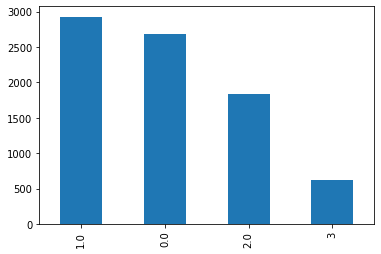

In [61]:
T['condition'].fillna('3', inplace=True)
T['condition'].value_counts().sort_values(ascending=False).plot.bar()

In [62]:
 T["scolor"] = reduce_cat(T["color_type"])

In [63]:
 tmp3  = pd.get_dummies(T["scolor"])

In [64]:
T = T.drop(["scolor","color_type"], axis=1)

In [66]:
T = pd.concat([T,tmp3], axis=1)

In [67]:
T.head()

,condition,length(m),height(cm),X1,X2,Agouti,Apricot,Black,Blue,Brown,...,Red,Sable,Seal,Silver,Tan,Torbie,Tortie,Tricolor,White,Yellow
0,0,0.87,42.73,0,7,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0.06,6.71,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0.24,41.21,0,7,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0.29,8.46,7,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0.71,30.92,0,7,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [74]:
#Prediting train result
T_pred = classifier.predict(T)

In [75]:
range(len(T_pred))

range(0, 8072)

In [76]:
#writing to the CSV feed
f = open('result.csv',"w")
count=0
f.write('pet_id,breed_category,pet_category')
for i in range(len(T_pred)):
    f.write(f'\n{test["pet_id"][i]},{int(T_pred[i][0])},{int(T_pred[i][1])} ')
    count+=1
f.close()